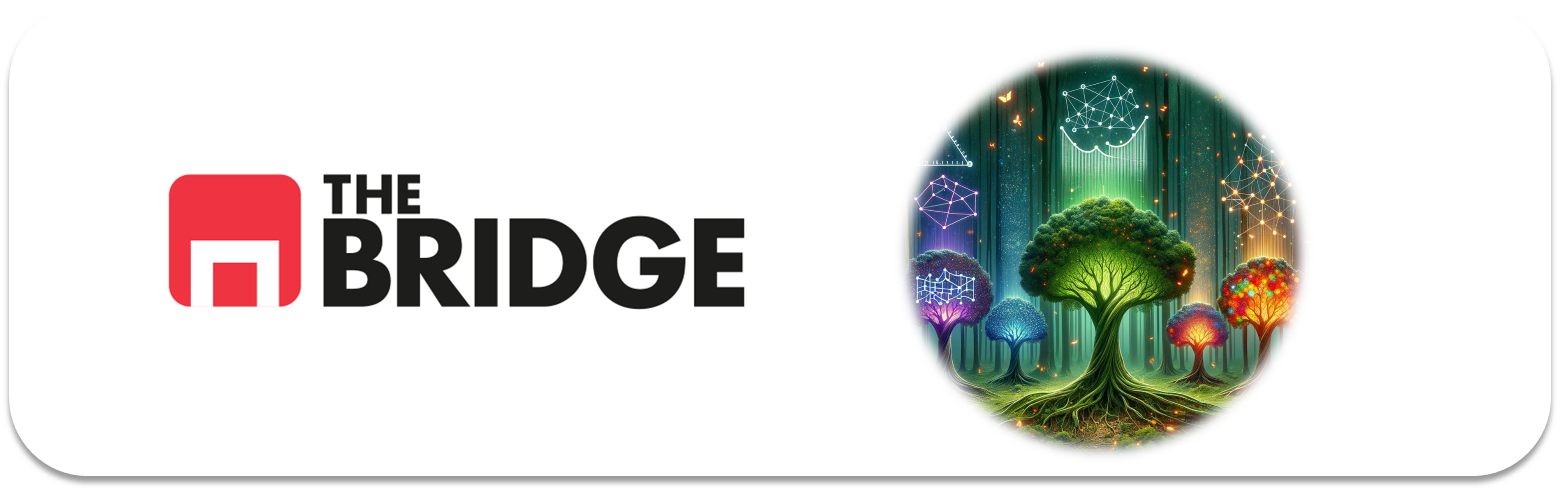

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

- baggingclassifier()
    - bootstrap=True enables replacement of samples
    - max_samples


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as booty

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [5]:
diabetes_df = pd.read_csv(url)
diabetes_df.columns = names


In [4]:
diabetes_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Check for duplicates
diabetes_df.duplicated().sum()

0

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabetes_df, test_size=0.2, random_state=42)

target = 'class'

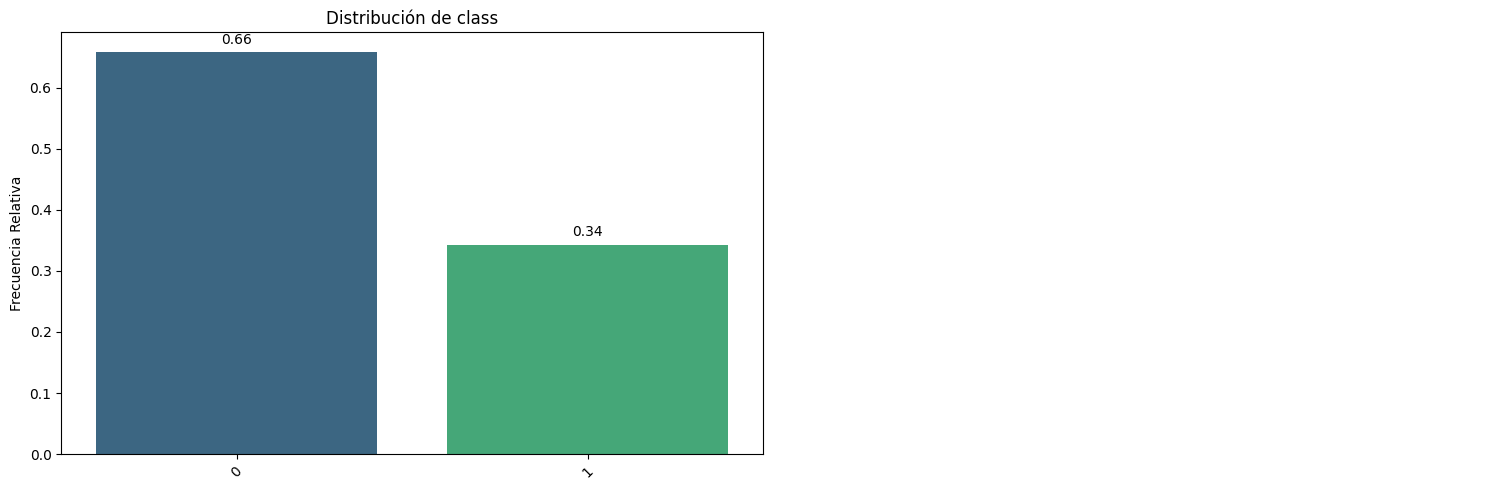

In [11]:
booty.pinta_distribucion_categoricas(train_set, [target],  mostrar_valores=True, relativa=True)

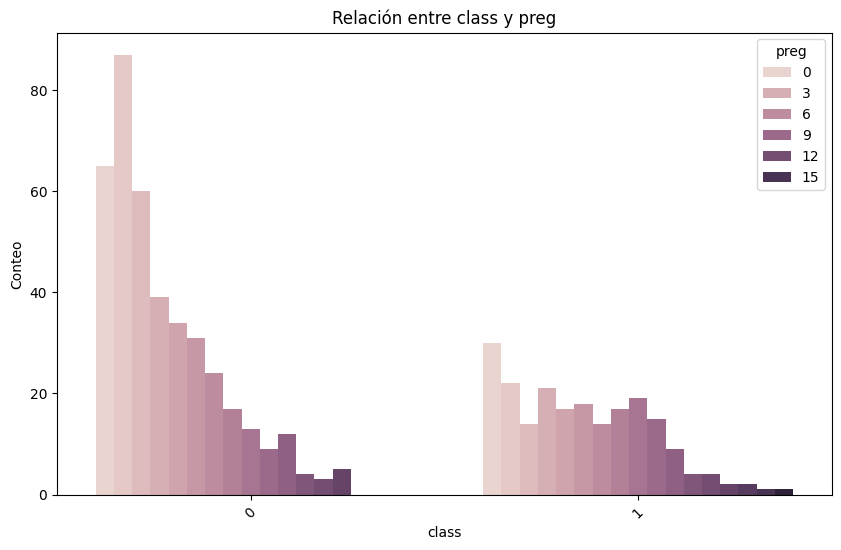

In [12]:
booty.plot_categorical_relationship_fin(train_set, target, 'preg')

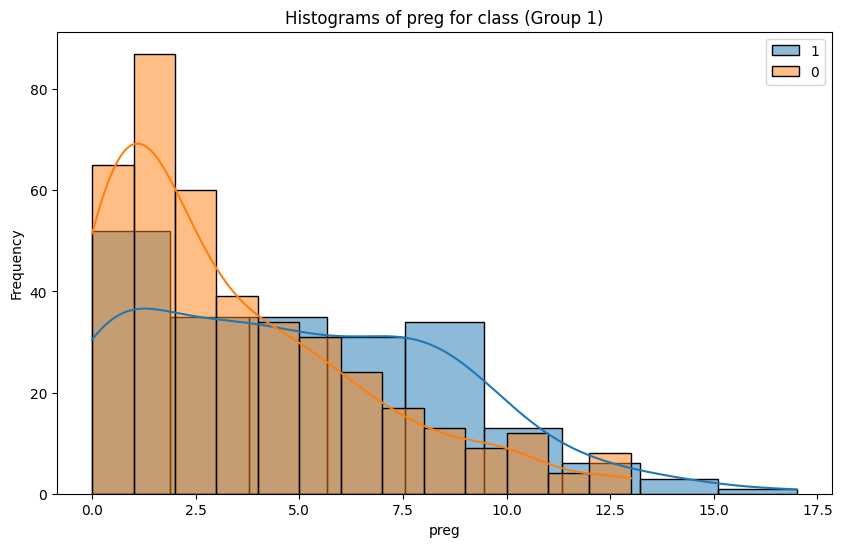

In [13]:
booty.plot_grouped_histograms(train_set, cat_col=target, num_col='preg', group_size=3)

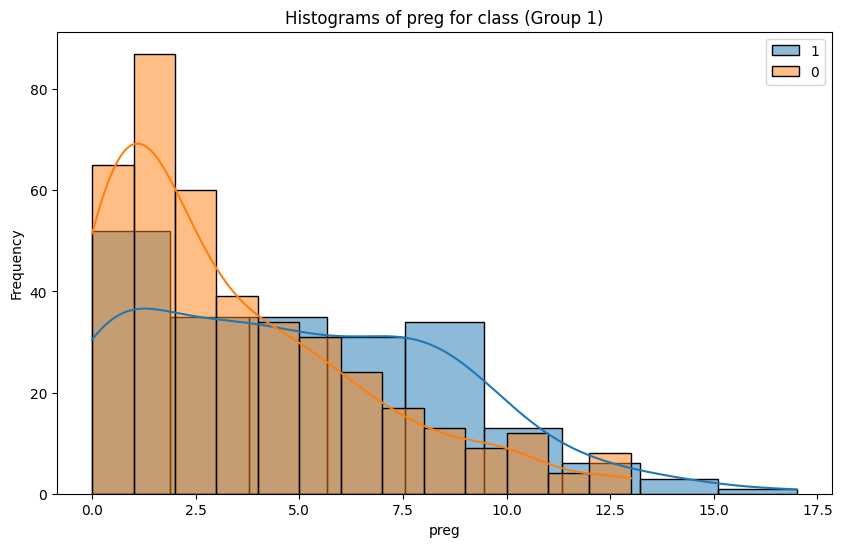

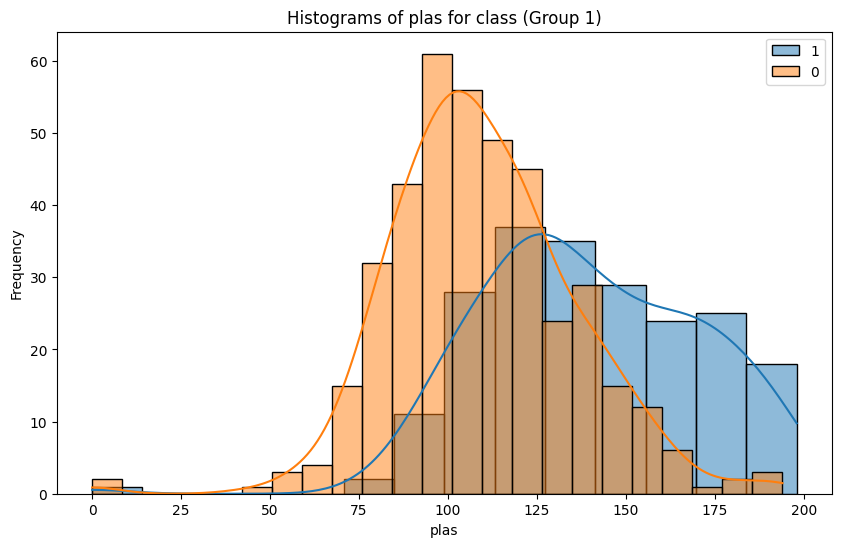

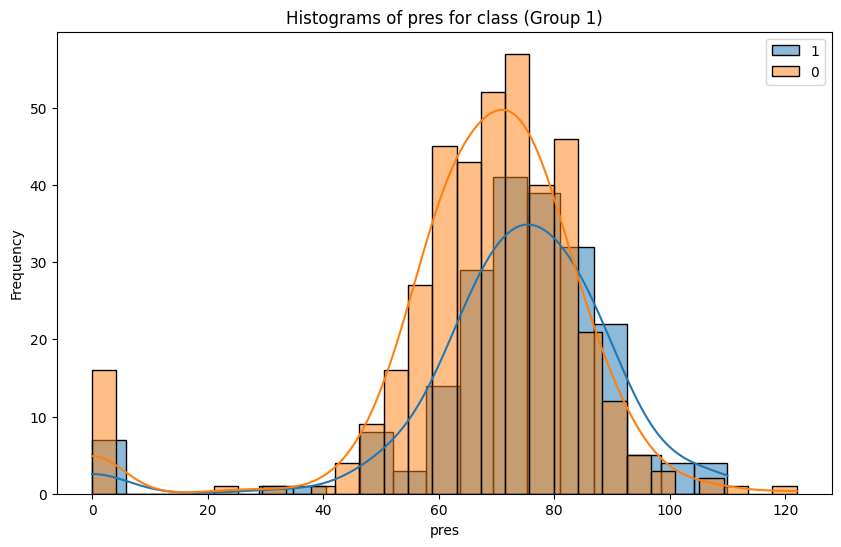

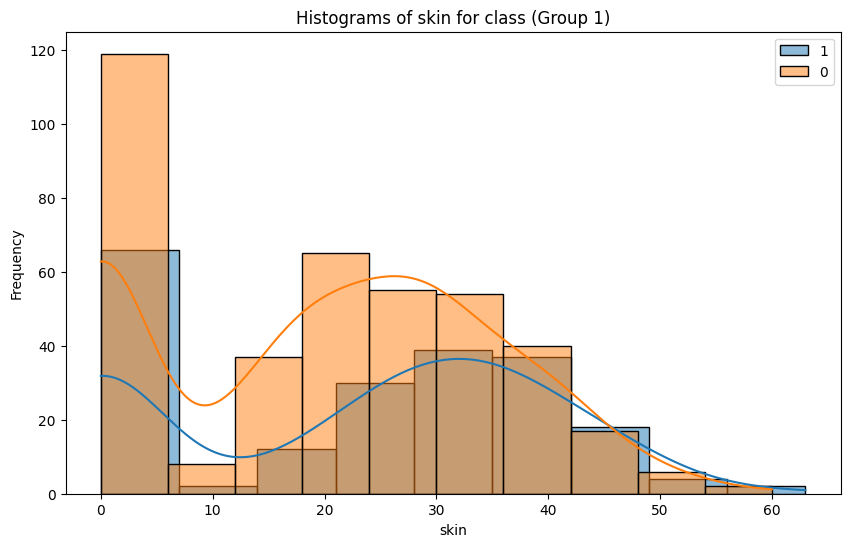

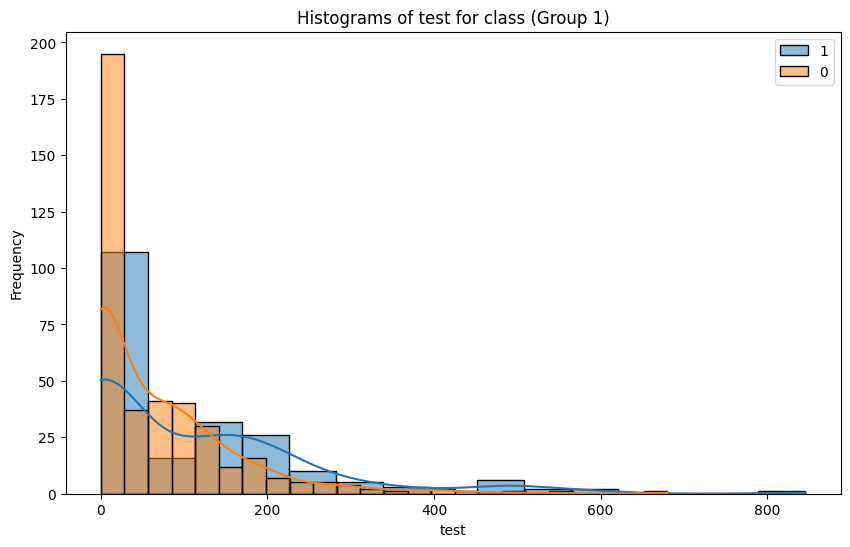

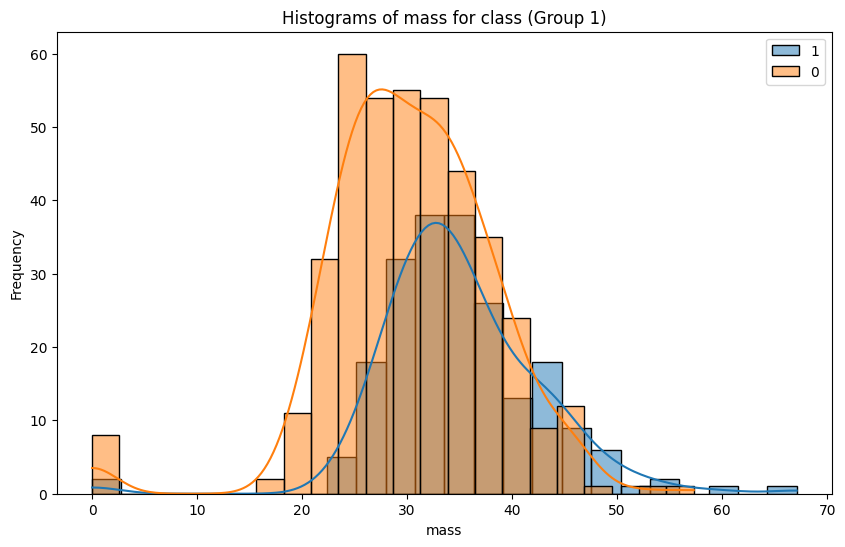

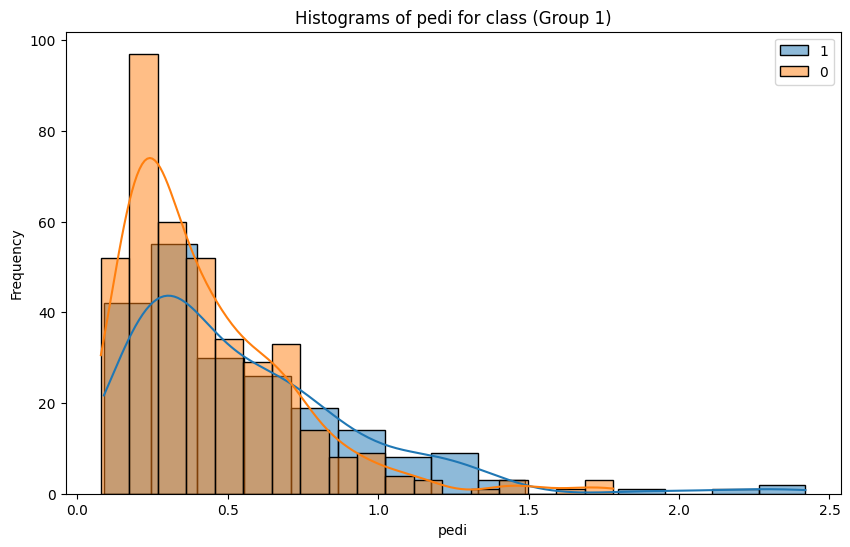

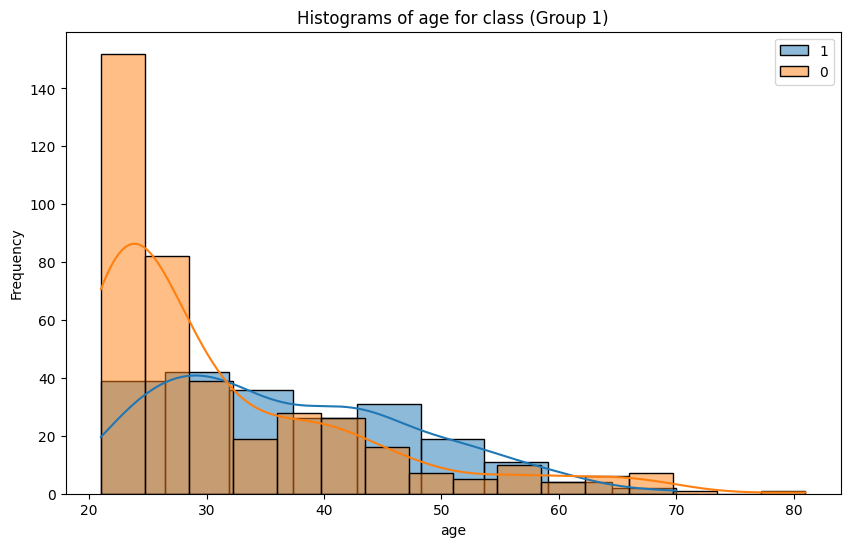

In [14]:
for col in train_set.drop(target, axis=1).columns.to_list():
    booty.plot_grouped_histograms(train_set, cat_col=target, num_col=col, group_size=3)

In [7]:
from sklearn.model_selection import train_test_split

# Define target (y) and features (X)
target = 'class'

X = diabetes_df.drop(target, axis=1)
y = diabetes_df['class']

# Get feature names in a list for later use
features = X.columns.to_list()

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
# Check distribution of target
y_train.value_counts(True)

0    0.657423
1    0.342577
Name: class, dtype: float64

- little bit unbalanced but not so bad

---
---
## Train Set Checks

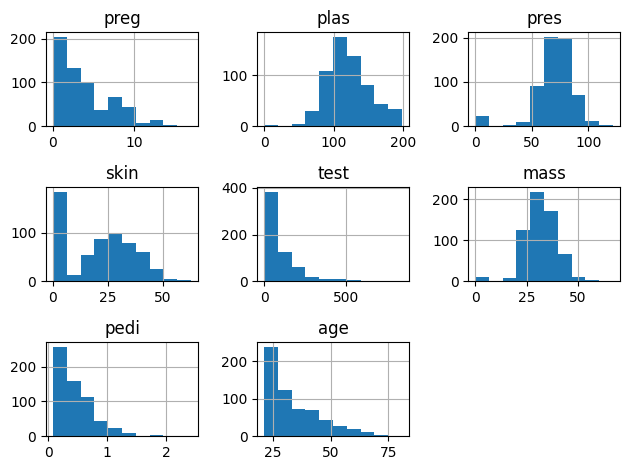

In [11]:
X_train.hist()
plt.tight_layout()

In [ ]:
booty.pinta_distribucion_categoricas

---
---
## Model Selection

In [37]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import xgboost as xgb

Use random forest classifier as base classifier
base_clf = RandomForestClassifier(max_depth=5, random_state=42)

can use: np.mean(cross_validation_score(base_clf, X_train, y_train, cv=5, scoring='balanced_accuracy'))

xgb_clf = XGBClassifier(max_depth=5, random_state=42)
lgb_clf = LGBMClassifier(max_depth=5, verbose=-100)

for nombre, model in zip(['Random Forest','XGBoost','LightGBM'],['base_clf, xgb_clf, lgb_clf]):
print(f'For {nombre}:', end = ' ')
print(np.mean(cross_val_score(modelo, X_train, y_train, cv=5, scoring='balanced_accuracy')))

---
#### Random Forest Classifier

In [38]:
# Initialize instance of RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_depth = 6,
                                 random_state = 42)

# Train model
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       403
           1       0.93      0.75      0.83       210

    accuracy                           0.90       613
   macro avg       0.91      0.86      0.88       613
weighted avg       0.90      0.90      0.89       613



<Axes: >

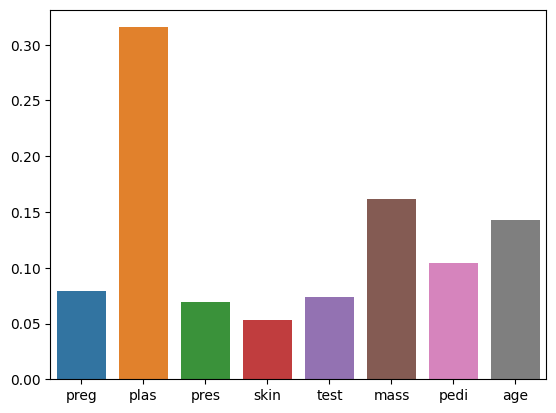

In [39]:
# Predict on train set only
y_pred_rnd_train = rnd_clf.predict(X_train)

# Print classification report for evaluation
print(classification_report(y_train, y_pred_rnd_train))

# Generate barplot of feature importances
sns.barplot(x=features, y=rnd_clf.feature_importances_, hue=features)

---
#### Ada Boost Classifier

In [40]:
# Initialize instance of AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100,
                             learning_rate = 0.3,
                             random_state=42)

# Train model
ada_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.3, n_estimators=100, random_state=42)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       403
           1       0.77      0.66      0.71       210

    accuracy                           0.82       613
   macro avg       0.80      0.78      0.79       613
weighted avg       0.81      0.82      0.81       613



<Axes: >

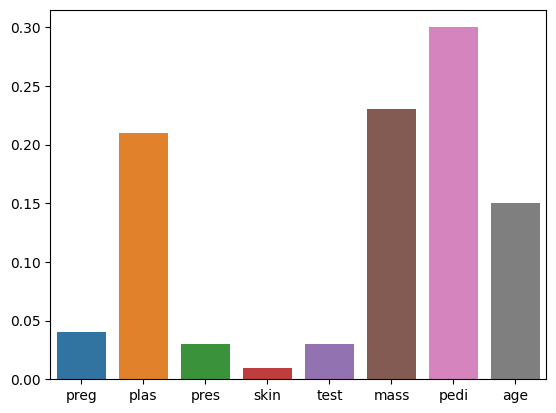

In [41]:
# Predict on train set only
y_pred_ada_train = ada_clf.predict(X_train)

# Print classification report for evaluation
print(classification_report(y_train, y_pred_ada_train))

# Generate barplot of feature importances
sns.barplot(x=features, y=ada_clf.feature_importances_, hue=features)

---
#### XG Boosting Classifier

In [42]:
# Initialize instance of XGBClassififer
xgb_clf = xgb.XGBClassifier(n_estimators=10,
                            learning_rate=0.3)

# Train model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       403
           1       0.95      0.85      0.90       210

    accuracy                           0.93       613
   macro avg       0.94      0.91      0.92       613
weighted avg       0.93      0.93      0.93       613



<Axes: >

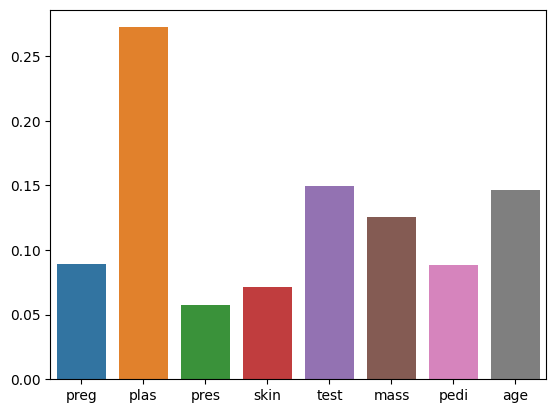

In [43]:
# Predict on train set only
y_pred_xgb_train = xgb_clf.predict(X_train)

# Print classification report for evaluation
print(classification_report(y_train, y_pred_xgb_train))

# Generate barplot of feature importances
sns.barplot(x=features, y=xgb_clf.feature_importances_, hue=features)

---
---
## Optimization

In [ ]:
rndF_params = {
    'n_estimators':[25,50,100],
    'learning_rate':[None,],
}

ada_params = {
    'n_estimators':[],
    'learning_rate':[],
}

xgb_params = {
    'n_estimators':[],
    'learning_rate':[],
}

---
#### Random Forest Classifier

In [ ]:
# Initialize GridSearchCV for RandomForestClassifier model and params grid
rndf_grid = GridSearchCV(rnd_clf,
                         param_grid = rndF_params,
                         cv = 5,
                         scoring = '')

# Train model
rndf_grid.fit(X_train, y_train)

In [ ]:
# Get best parameters found by GridSearchCV
rndf_grid.best_params_

In [ ]:
# Predict on test set using optimized model params
y_pred_rndf_opt = rndf_grid.best_estimator_.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rndf_opt))

---
#### Ada Boost Classifier

In [ ]:
# Initialize GridSearchCV for AdaBoostClassifier model and params grid
ada_grid = GridSearchCV(ada_clf,
                         param_grid = ada_params,
                         cv = 5,
                         scoring = '')

# Train model
ada_grid.fit(X_train, y_train)

In [ ]:
# Get best parameters found by GridSearchCV
rndf_grid.best_params_

In [ ]:
# Predict on test set using optimized model params
y_pred_ada_opt = ada_grid.best_estimator_.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_ada_opt))

---
#### XGBoost

In [ ]:
# Initialize GridSearchCV for XGBoostClassifier model and params grid
xgb_grid = GridSearchCV(xgb_clf,
                         param_grid = xgb_params,
                         cv = 5,
                         scoring = '')

# Train model
xgb_grid.fit(X_train, y_train)

In [ ]:
# Get best parameters found by GridSearchCV
xgb_grid.best_params_

In [ ]:
# Predict on test set using optimized model params
y_pred_xgb_opt = xgb_grid.best_estimator_.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_xgb_opt))